In [3]:
#Importando base de dados
import pandas as pd
dados = pd.read_csv('tips.csv')

In [4]:
#import pandas as pd #Para importar o pandas segundo a convenção:
#pd.read_csv('tips.csv') #Ler um arquivo do tipo csv chamado tips:
#tips.head() #Exibir as 5 primeiras linhas do DataFrame:
#tips.tail() #Exibir as 5 ultimas linhas do DataFrame:
#tips.columns #Listar as colunas presentes no DataFrame:
#tips.shape #Exibir a quantidade de linhas e colunas presentes no DataFrame:
#tips.drop('day', axis=1) #Deletar uma coluna do DataFrame:

In [5]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
#tradução
#buascar nomes das colunas
dados.columns

renomear = {
    'total_bill' : 'valor_da_conta',
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
}

gorjetas = dados.rename(columns = renomear)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [7]:
#traduzir o conteudo 
#buscando o distinct da coluna
gorjetas.sobremesa.unique()
#atribuindo um dicionario do que será alterado
sim_nao = {
    'No':'Não', 'Yes':'Sim'
}
#mapeando o campo e atualiando o dataframe
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [8]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
dias = {
    'Sun' :'Domingo', 
    'Sat' :'Sabado', 
    'Thur':'Quinta', 
    'Fri' :'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [10]:
gorjetas.hora_do_dia.unique()
horadia = {
    'Dinner':'Jantar', 
    'Lunch':'Almoço'
}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horadia)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [11]:
#intall 
!pip install seaborn==0.9.0

In [12]:
import seaborn as sns

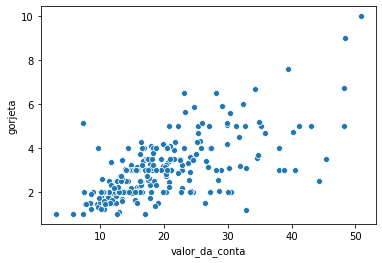

In [13]:
#analise 1 - Valor da gorjeta
#Eixo X= variável preditora; explicativa ou independente
#Eixo Y= variável resposta ou dependente
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)



In [14]:
# Visualmente o valor da gorjeta aumenta conforme o valor da conta

In [15]:
##criando campo porcentagem
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head(3)


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


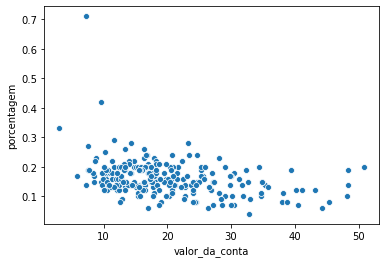

In [16]:
porcentagem_conta = sns.scatterplot(x= 'valor_da_conta', y= 'porcentagem', data=gorjetas)

In [17]:
#visualmente o valor da conta nao é proporcional ao valor da gorjeta

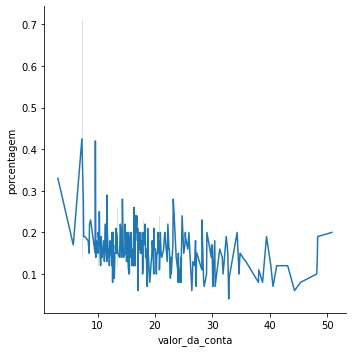

In [18]:
porcentagem_conta_linha = sns.relplot(x= 'valor_da_conta', y= 'porcentagem',kind = 'line', data=gorjetas)
#visivelmente podemos analisar que há uma queda comparando valor da conta e a porcentagem da gorjeta

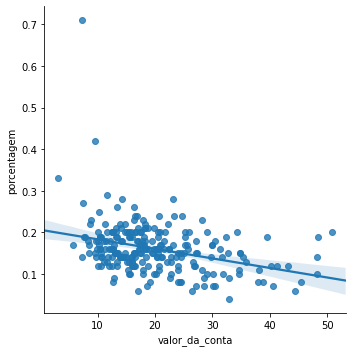

In [19]:
sns.lmplot(x= 'valor_da_conta', y= 'porcentagem', data=gorjetas)
# usando o lm
#Esses exemplos se concentram em gráficos de modelo de regressão básicos para exibir as várias opções de facetas
#Traccando uma relação linear simples entre duas variáveis:

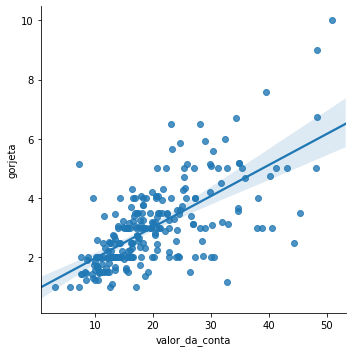

In [20]:
sns.lmplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)


In [21]:
#Para visualizar a figura armazenada na variável utilizamos a função: get_figure()
#Por exemplo: primeiro_plot.get_figure()
#É possível adicionar um subtítulo a um plot gerado com o código figure.suptitle(). Por exemplo, ao executar o código:
#primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')    
#Para visualizar a imagem com o subtítulo, podemos usar mais uma vez o get_figure().    
#Para adicionar um título, podemos utilizar o set_title(). 
#Por exemplo primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta') 
#Para alterar a descrição das labels do eixo x e do eixo y, 
#usamos a função set. Por exemplo: primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
#Para salvar uma gráfico e fazer download da imagem no formato png por exemplo, 
#atribuímos a uma variável a função get_figure().
#Por exemplo: imagem = primeiro_plot.get_figure()
#Em seguida, para salvar a imagem usamos o comando imagem.savefig('imagem.png')    

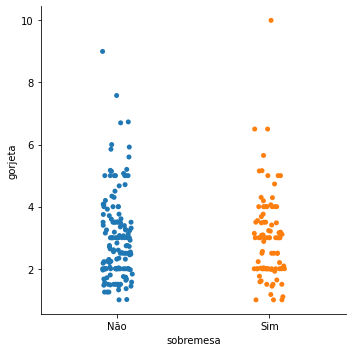

In [25]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

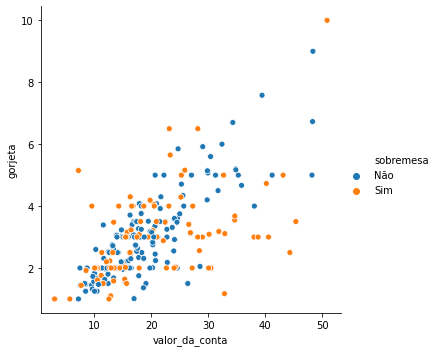

In [26]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

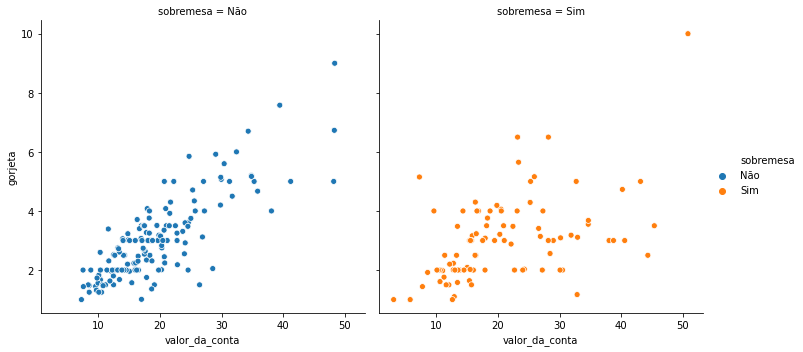

In [24]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

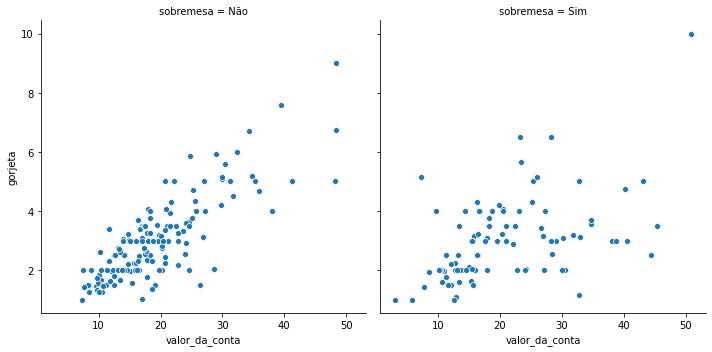

In [28]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)


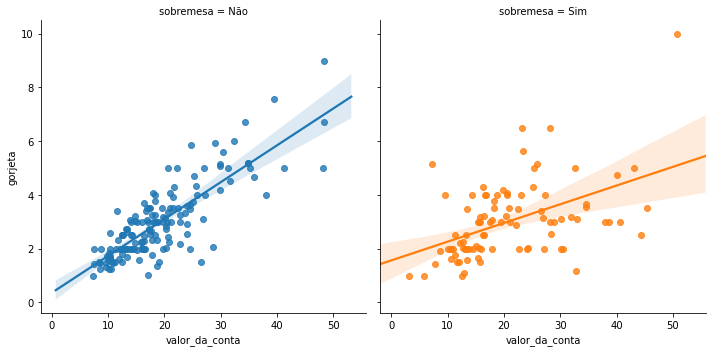

In [29]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

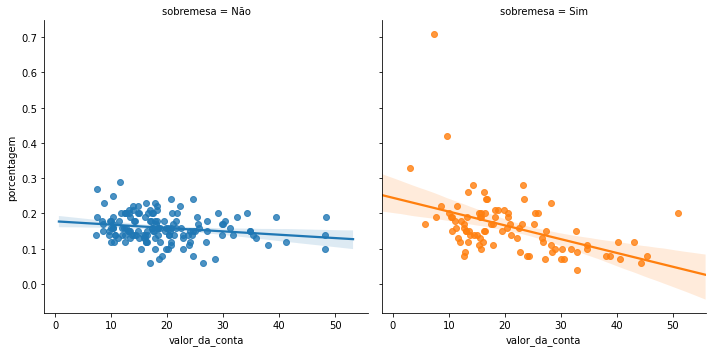

In [30]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

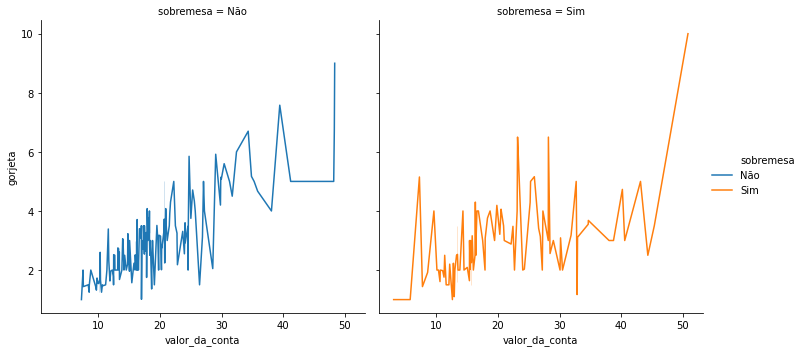

In [31]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)
